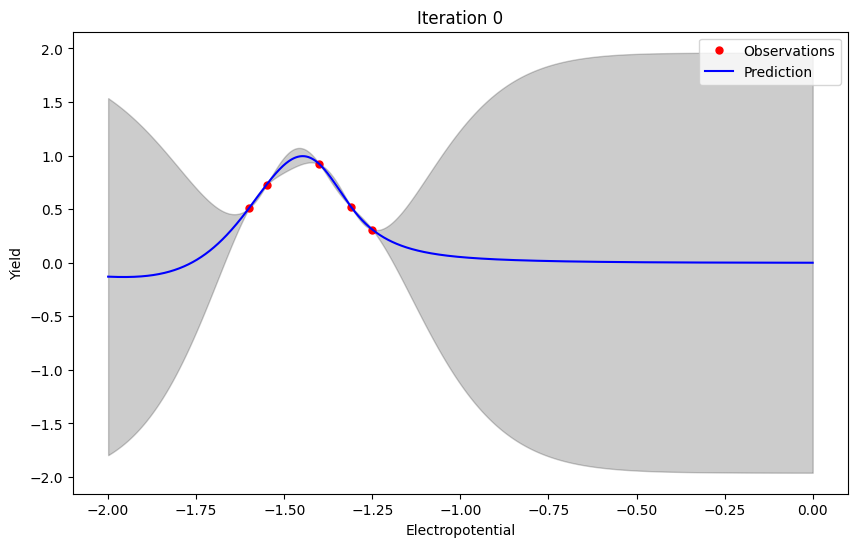

Iteration 1: Proposed Electropotential = -0.20486243656570954, Measured Yield = [0.29649584]


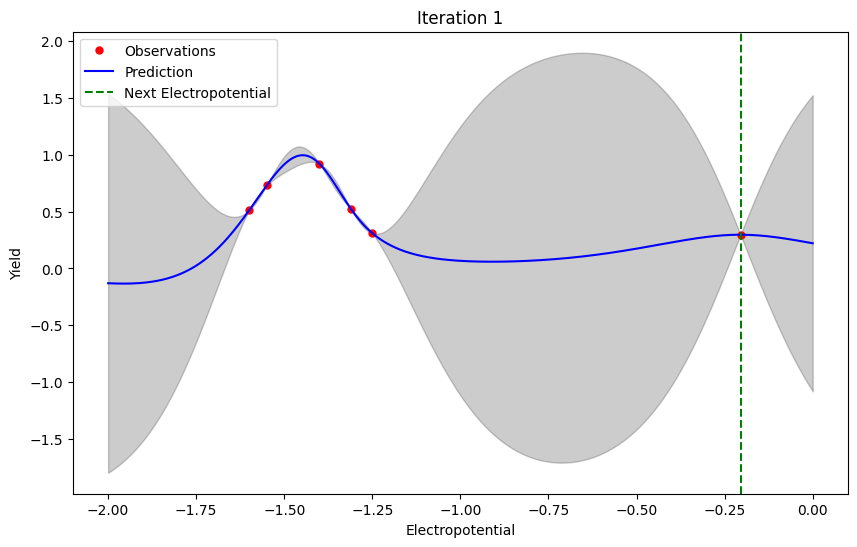

Iteration 2: Proposed Electropotential = 0.0, Measured Yield = [0.48734311]


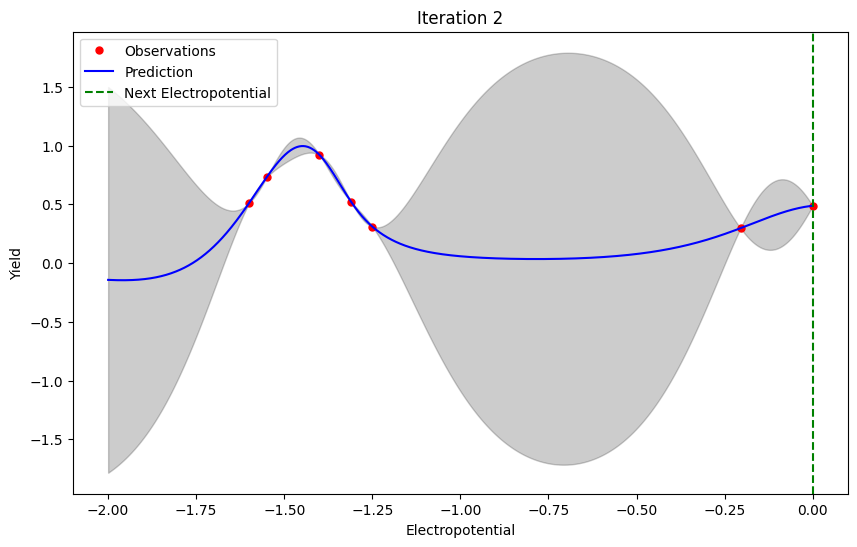

Iteration 3: Proposed Electropotential = -0.6928412001448455, Measured Yield = [-0.16103005]


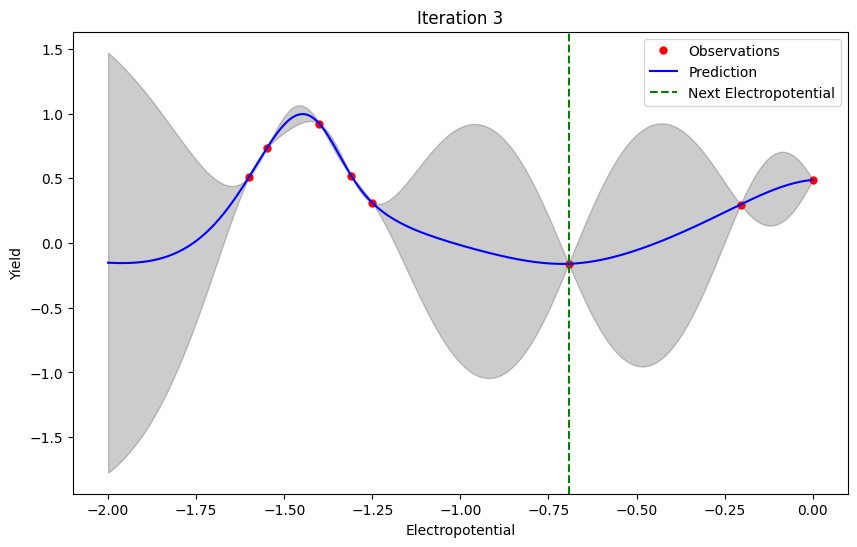

Iteration 4: Proposed Electropotential = -0.035664181684194274, Measured Yield = [0.45822345]


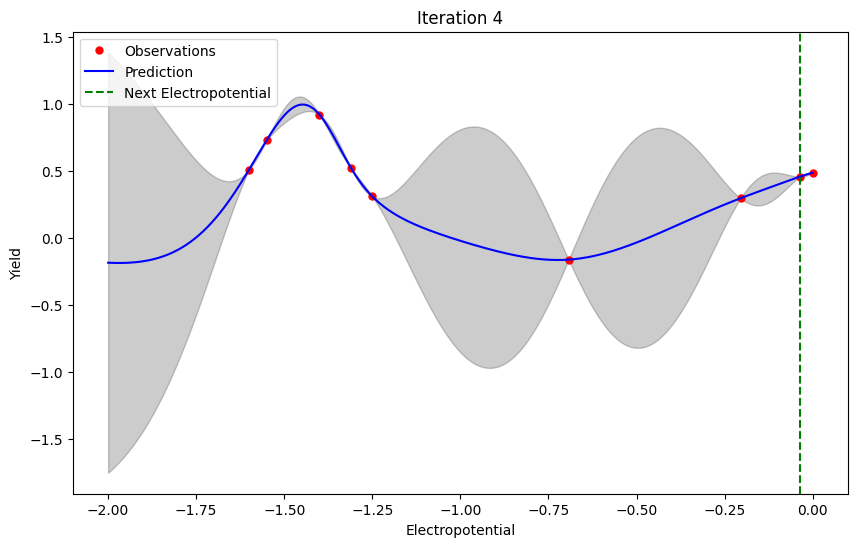

Iteration 5: Proposed Electropotential = -1.5384369687496458, Measured Yield = [-0.87414874]


c:\Program Files\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


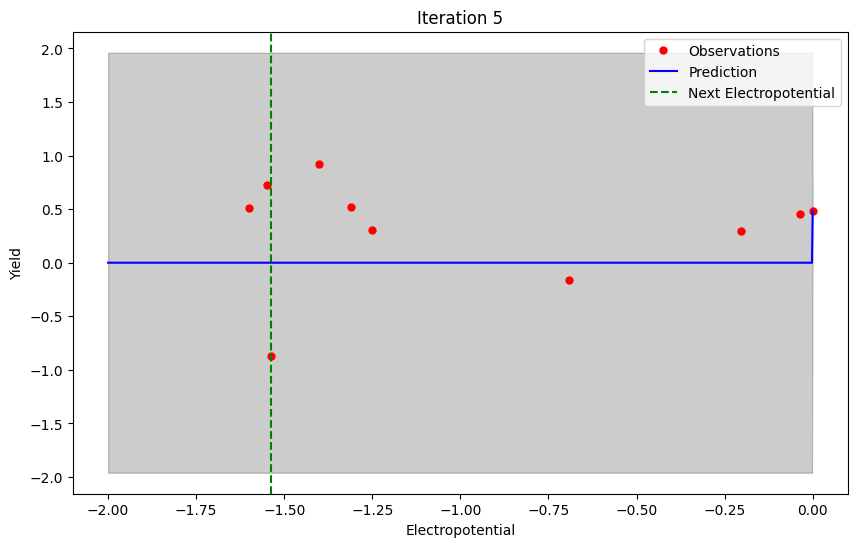

c:\Program Files\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Iteration 6: Proposed Electropotential = -1.016956651715226, Measured Yield = [-0.59171689]


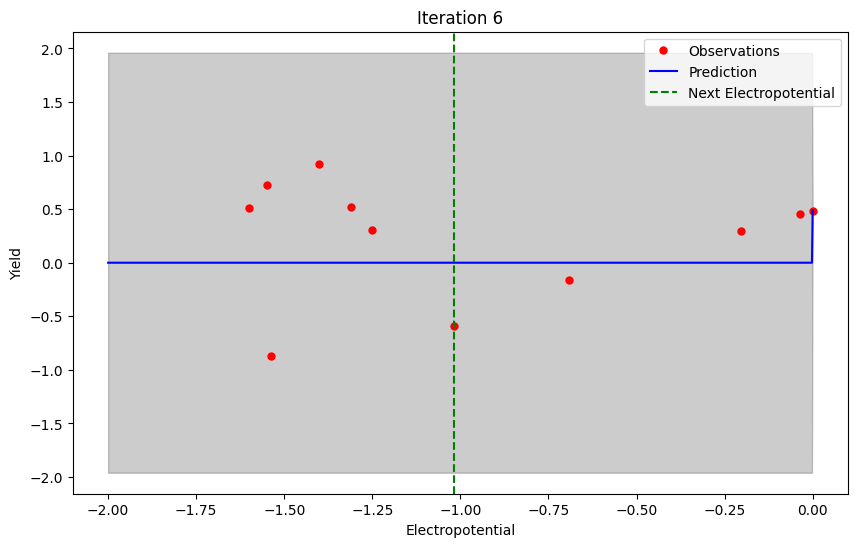

c:\Program Files\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Iteration 7: Proposed Electropotential = -1.700755077936271, Measured Yield = [-0.8744461]


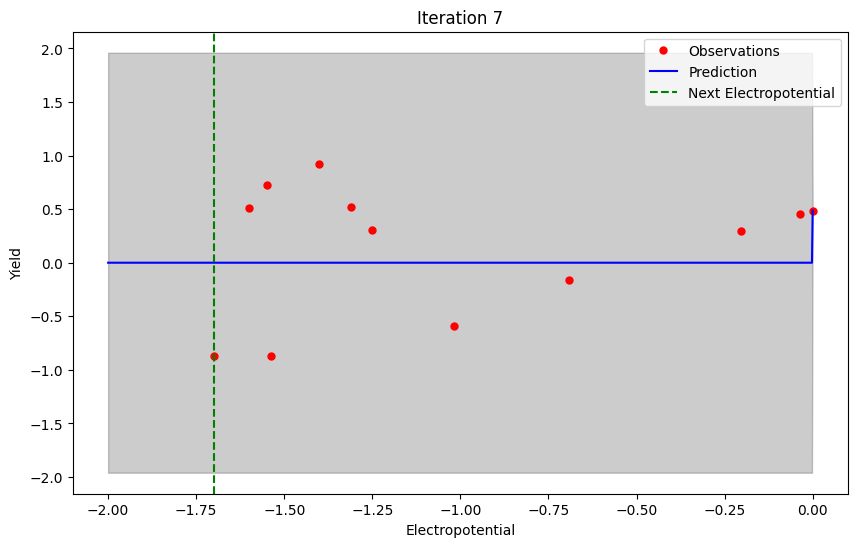

c:\Program Files\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Iteration 8: Proposed Electropotential = -1.8225379311529768, Measured Yield = [-0.93048287]


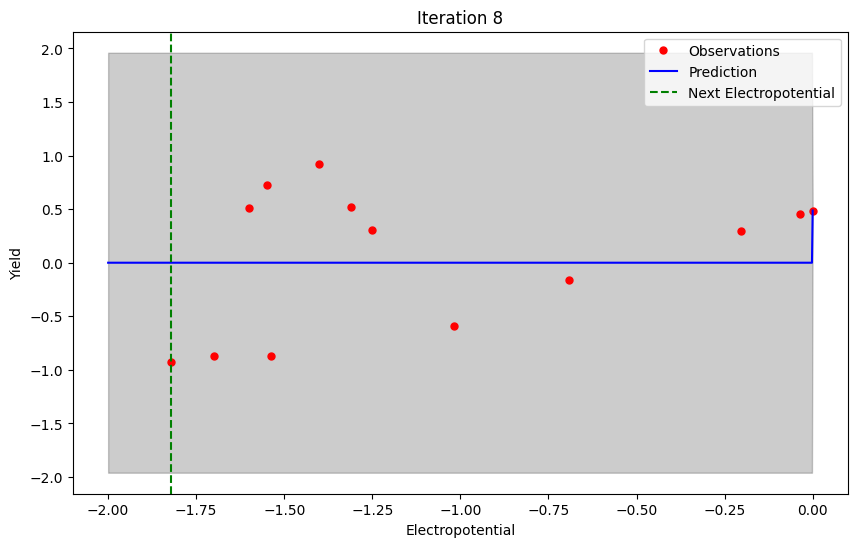

Iteration 9: Proposed Electropotential = -1.8178148682319653, Measured Yield = [-0.89600315]


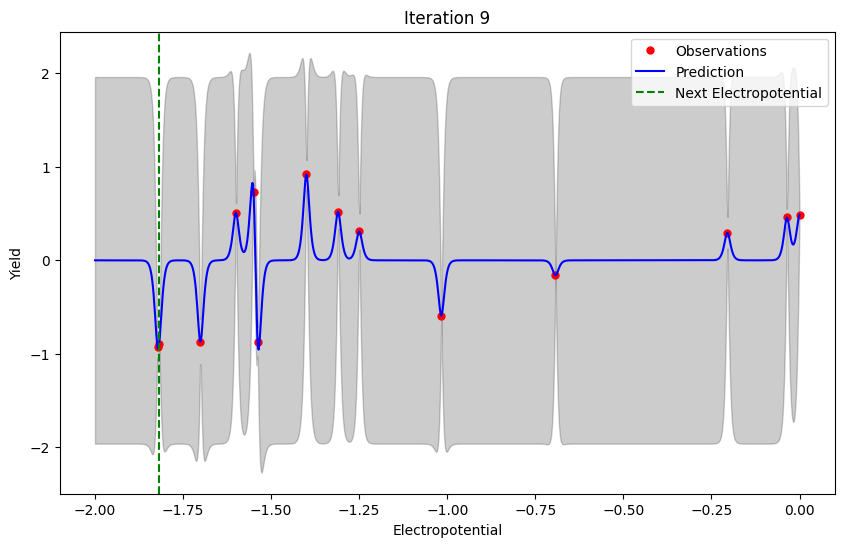

Iteration 10: Proposed Electropotential = -0.3447687754607629, Measured Yield = [0.11087965]


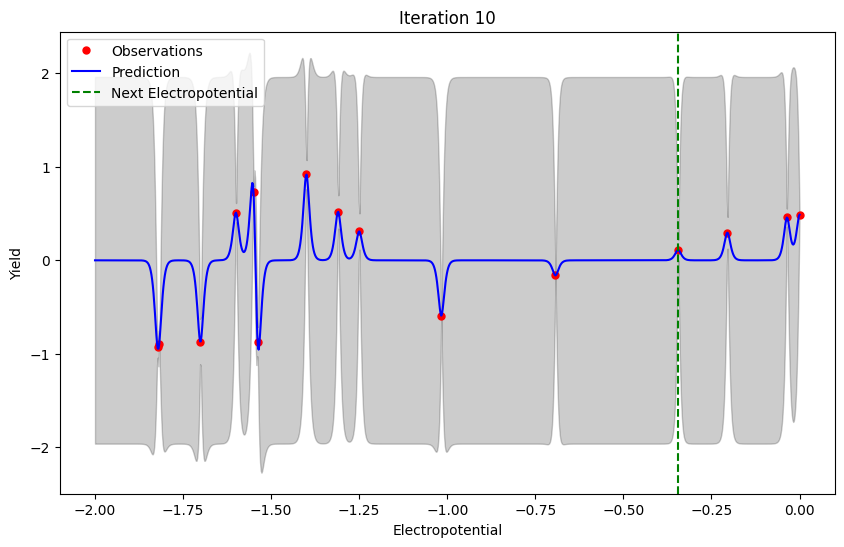

Iteration 11: Proposed Electropotential = -0.1878372719395594, Measured Yield = [0.42558105]


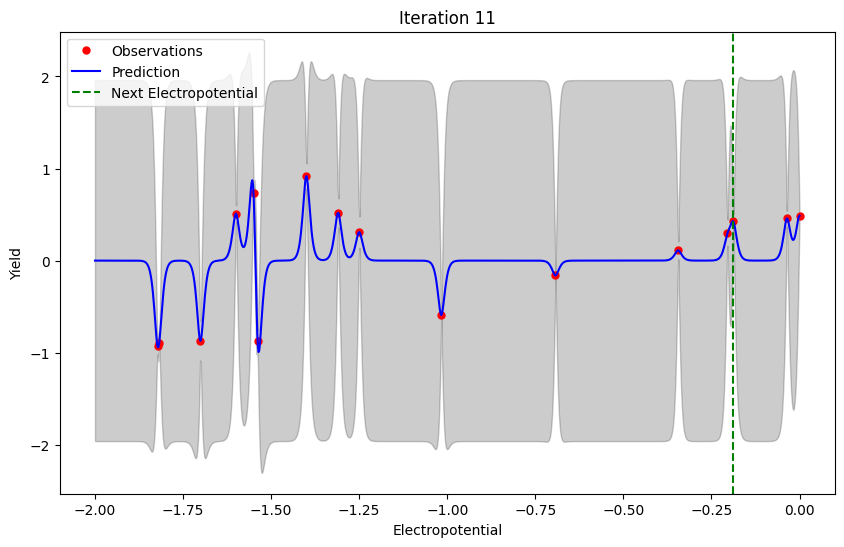

Iteration 12: Proposed Electropotential = -0.37114615514637944, Measured Yield = [0.07416095]


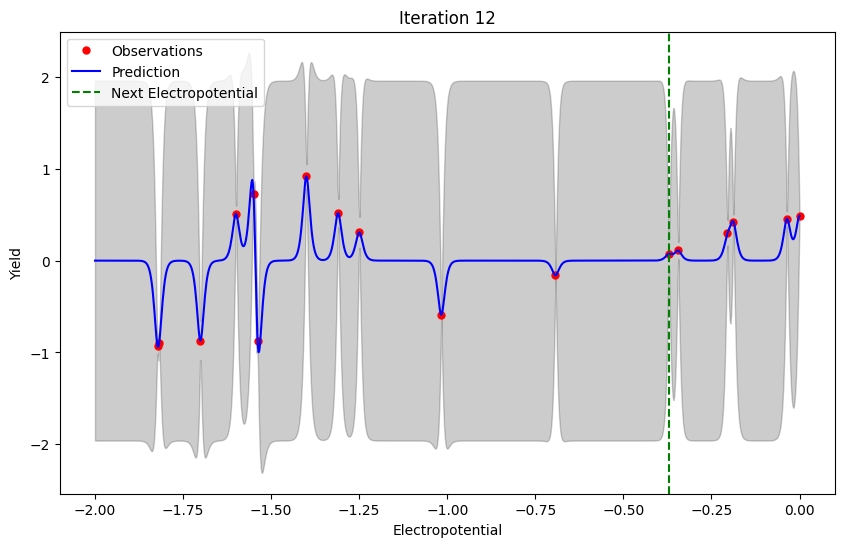

Iteration 13: Proposed Electropotential = -0.17032084476990156, Measured Yield = [0.32154174]


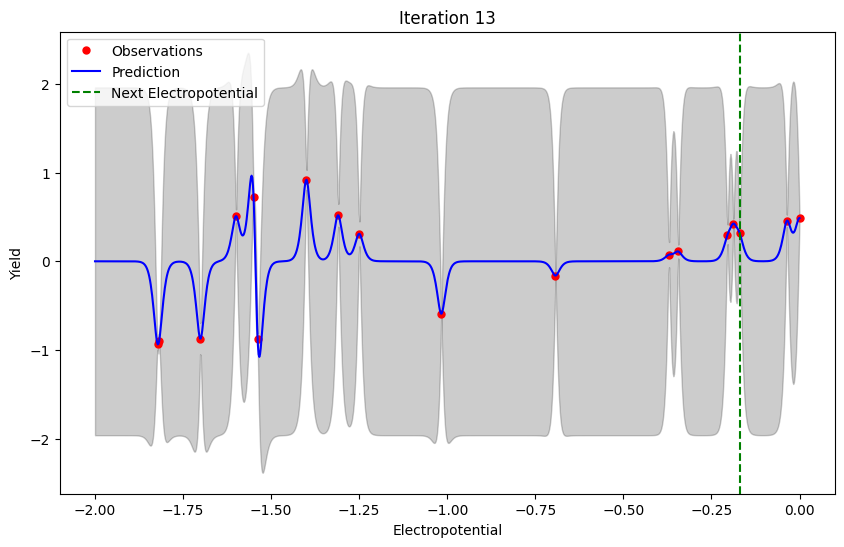

Iteration 14: Proposed Electropotential = -0.3118601943155622, Measured Yield = [0.23578252]


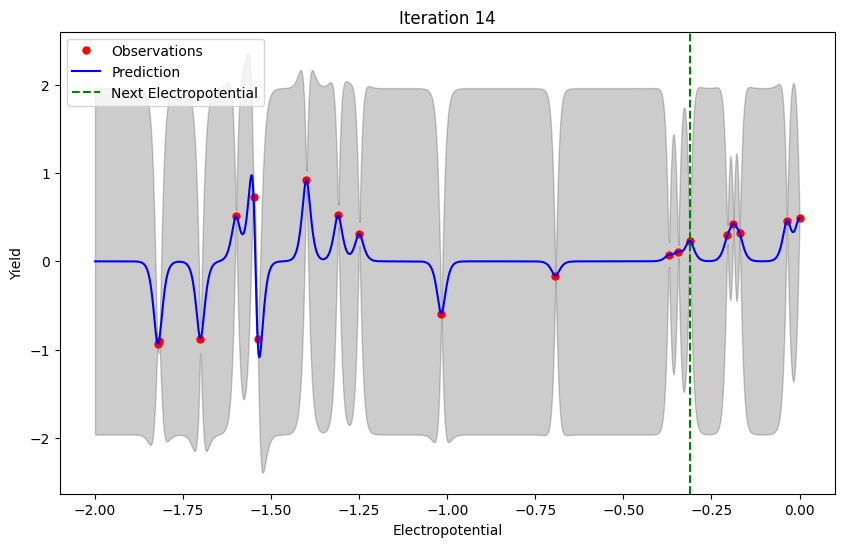

Iteration 15: Proposed Electropotential = -0.8165164632085111, Measured Yield = [-0.3644867]


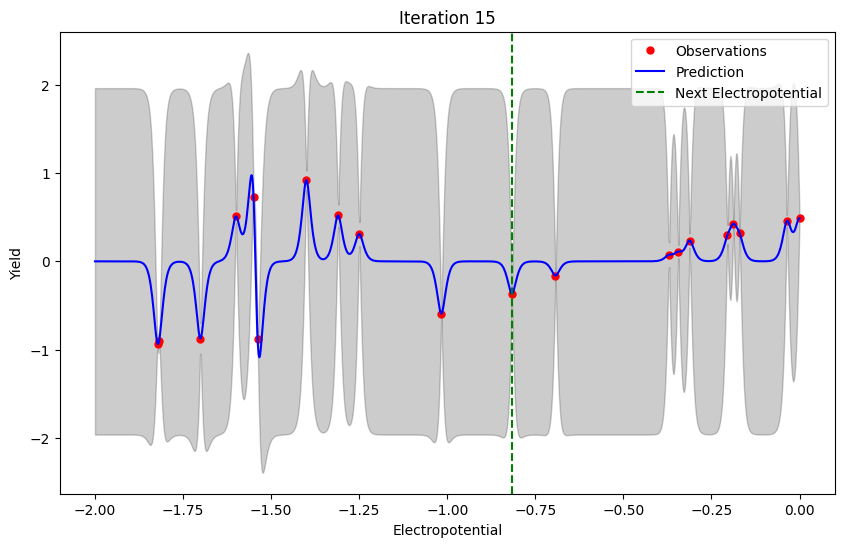

Iteration 16: Proposed Electropotential = -0.017567015640705123, Measured Yield = [0.48520553]


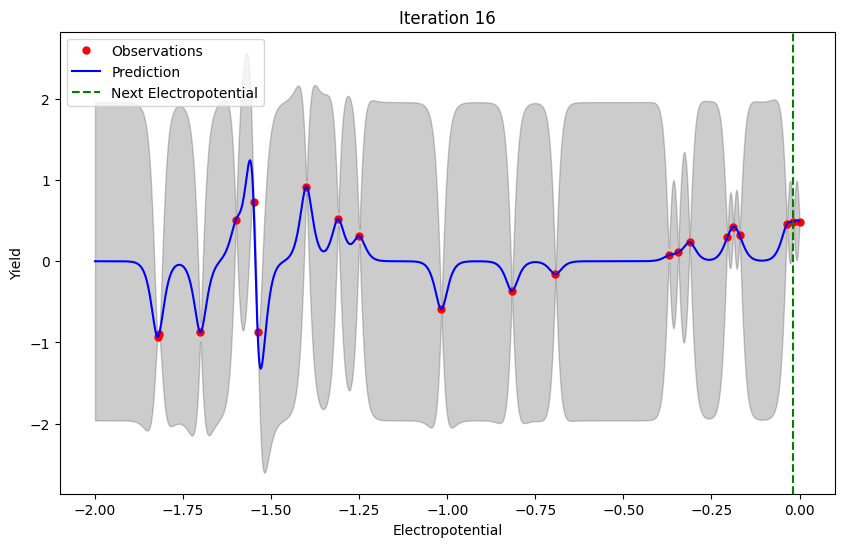

Iteration 17: Proposed Electropotential = -1.8250927017967602, Measured Yield = [-1.0569687]


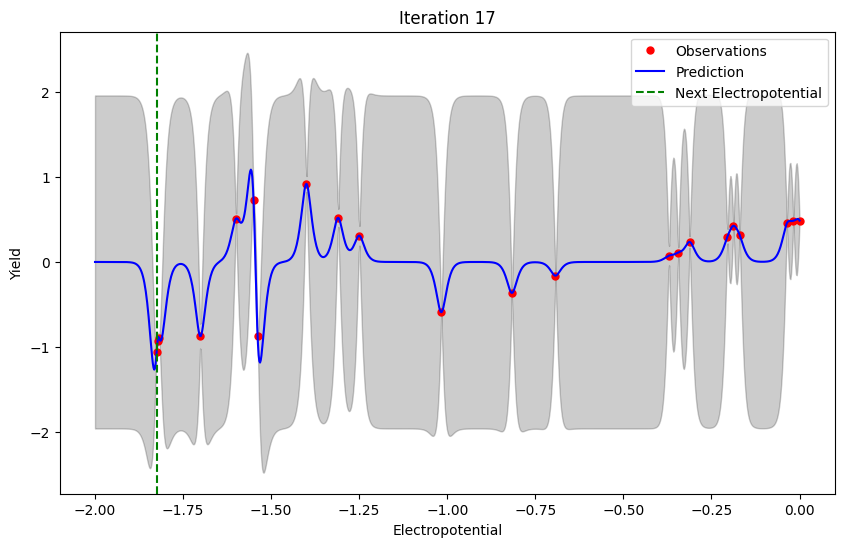

Iteration 18: Proposed Electropotential = -0.9146797831141434, Measured Yield = [-0.45912557]


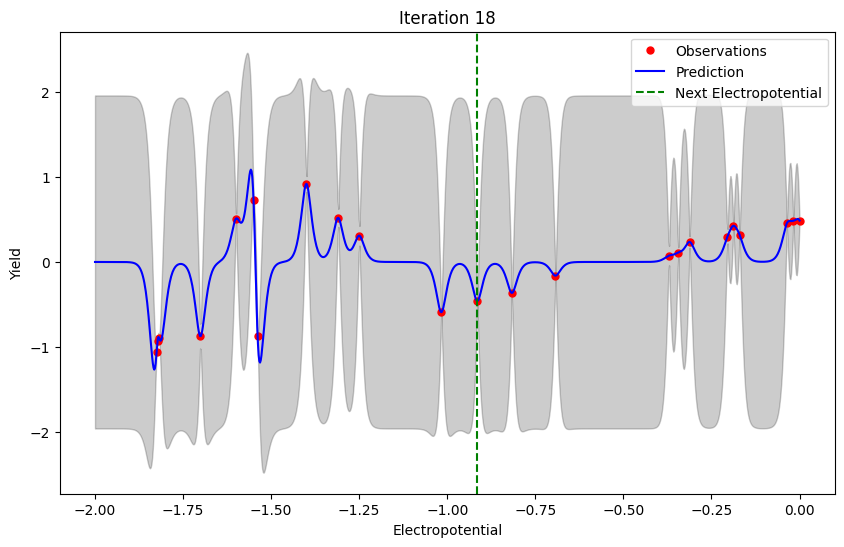

Iteration 19: Proposed Electropotential = -0.13791575048755733, Measured Yield = [0.39588771]


c:\Program Files\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


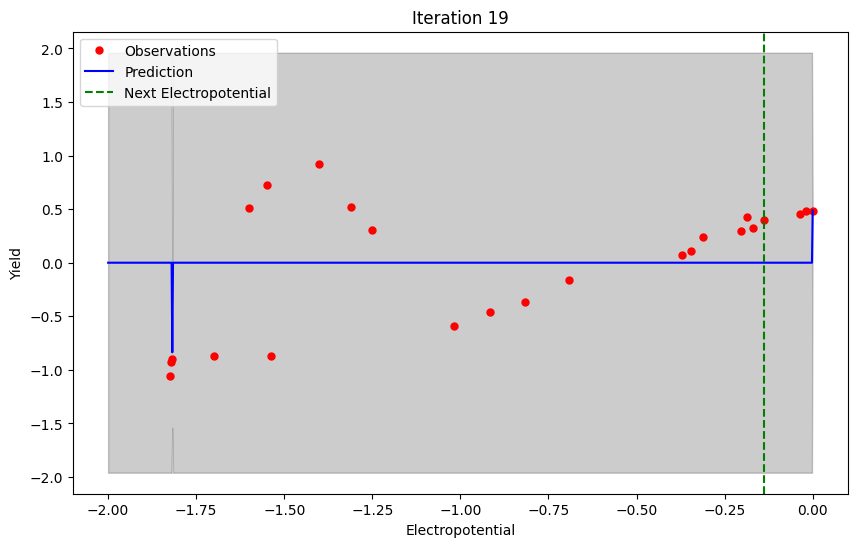

Iteration 20: Proposed Electropotential = -1.1622188961184783, Measured Yield = [-0.60037449]


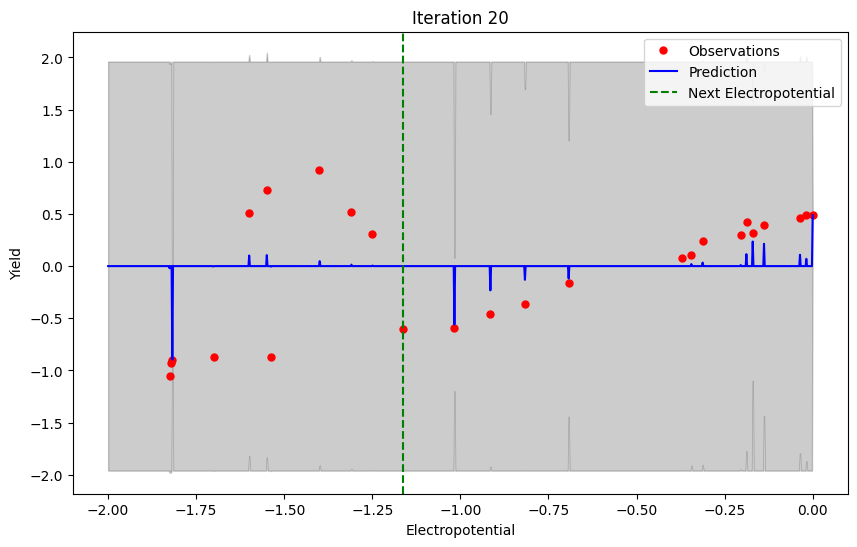

Optimal Electropotential: -1.4
Maximum Yield: 0.92


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern
from scipy.optimize import minimize
from scipy.stats import norm

# Initial known data (example data, replace with actual known data)
# E_Zn = -1.31 V, E_Mn = -1.55 V
initial_electropotentials = np.array([-1.60, -1.55, -1.40, -1.31, -1.25])
initial_yields = np.array([0.51, 0.73, 0.92, 0.52, 0.31])

# Using Gaussian Process Regression for Bayesian Optimization
# Define Gaussian Kernel with Matern kernel
kernel = Matern(nu=2.5)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Function to fit the GP model
def fit_gp(electropotentials, yields):
    gp.fit(electropotentials.reshape(-1, 1), yields)
    return gp

# Acquisition function (Expected Improvement)
def expected_improvement(x, gp, y_max, xi=0.01):
    mu, sigma = gp.predict(x.reshape(-1, 1), return_std=True)
    with np.errstate(divide='warn'):
        imp = mu - y_max - xi
        Z = imp / sigma
        ei = imp * norm.cdf(Z) + sigma * norm.pdf(Z)
        ei[sigma == 0.0] = 0.0
    return -ei  # Negative because we will minimize this function

# Bayesian Optimization Loop
def bayesian_optimization(n_iters, initial_electropotentials, initial_yields):
    # Fit the GP model with the initial data
    gp = fit_gp(initial_electropotentials, initial_yields)
    
    # Initialize variables
    y_max = max(initial_yields)
    X = initial_electropotentials
    Y = initial_yields

    # Plot the initial GP model and acquisition function
    plot_gp(gp, X, Y, None, 0)

    for i in range(n_iters):
        # Propose next point
        res = minimize(expected_improvement, x0=[np.random.uniform(-2, 0)], 
                       bounds=[(-2, 0)], 
                       method='L-BFGS-B',
                       args=(gp, y_max))
        
        next_x = res.x
        # Simulate yield measurement (replace this with actual experiment)
        next_y = simulate_yield(next_x)
        
        # Update dataset
        X = np.append(X, next_x)
        Y = np.append(Y, next_y)
        
        # Update GP model
        gp = fit_gp(X, Y)
        
        # Update maximum yield
        y_max = max(Y)
        
        print(f"Iteration {i+1}: Proposed Electropotential = {next_x[0]}, Measured Yield = {next_y}")

        # Plot the GP model and acquisition function
        plot_gp(gp, X, Y, next_x, i + 1)

    return X, Y

# Simulate yield measurement with random noise
# This function should be replaced with actual experimental data results
def simulate_yield(electropotential):
    # Example function with added noise, replace with actual experimental data
    true_yield = np.sin(electropotential) * np.exp(-electropotential / 5) + 0.5
    noise = np.random.normal(0, 0.05)
    return true_yield + noise

# Plotting function
def plot_gp(gp, X, Y, next_x, iteration):
    x = np.linspace(-2, 0, 1000).reshape(-1, 1)
    y_pred, sigma = gp.predict(x, return_std=True)
    
    plt.figure(figsize=(10, 6))
    plt.plot(X, Y, 'r.', markersize=10, label='Observations')
    for i in range(len(X)):
        plt.text(X[i], Y[i], f'({X[i]:.2f}, {Y[i]:.2f})', fontsize=9)
    plt.plot(x, y_pred, 'b-', label='Prediction')
    plt.fill_between(x.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, color='k')
    if next_x is not None:
        plt.axvline(next_x, color='g', linestyle='--', label='Next Electropotential')
    plt.title(f'Iteration {iteration}')
    plt.xlabel('Electropotential')
    plt.ylabel('Yield')
    plt.legend()
    plt.show()

# Run the Bayesian Optimization
final_electropotentials, final_yields = bayesian_optimization(20, initial_electropotentials, initial_yields)

print("Optimal Electropotential:", final_electropotentials[np.argmax(final_yields)])
print("Maximum Yield:", max(final_yields))